In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages
import os

In [14]:
key = os.getenv("GOOGLE_API_KEY")
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", api_key=key)

In [ ]:
class State(TypedDict):
    
    title: str  
    outline: str
    content: str
    

In [21]:
def create_outline(state:State) -> State:
    title = state["title"]
    prompt = f"Generate a detailed outline for a blog for a topic {title}"
    outline = llm.invoke(prompt).content
    state["outline"] = outline
    return state

In [22]:
def create_blog(state:State) -> State:
    outline = state["outline"]
    title = state["title"]
    prompt = f"Write a detailed blog for the title {title} using the following outline /n {outline} "
    content = llm.invoke(prompt).content
    state["content"] = content
    return state

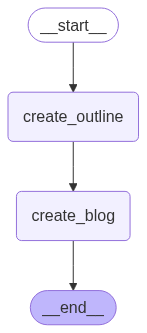

In [23]:
graph = StateGraph(State)
graph.add_node("create_outline", create_outline)
graph.add_node("create_blog", create_blog)
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_blog")
graph.add_edge("create_blog", END)
workflow = graph.compile()
workflow

In [24]:
initial_state = {"title": "hitler's reign"}
final_state = workflow.invoke(initial_state)
print(final_state["content"])

# Hitler's Reign: A Descent into Darkness and Destruction

Few periods in human history cast as long and dark a shadow as the twelve years of Adolf Hitler's reign over Germany. It was a time that redefined evil, plunged the world into its deadliest conflict, and left an indelible scar on the collective human consciousness. From the fringes of political discourse, Adolf Hitler and his National Socialist German Workers' Party (Nazi Party) ascended to absolute power, transforming a nation and unleashing unprecedented destruction upon the world. This blog post will delve into the meticulously planned consolidation of his totalitarian state, the path to global war, the systematic atrocities of the Holocaust, and the ultimate downfall of the Third Reich, emphasizing the critical importance of understanding this devastating chapter in human history.

## The Ascent to Absolute Power (1933-1934)

The stage for Hitler's rise was set by the profound instability of the Weimar Republic. Following W

In [25]:
print(final_state['outline'])

Here's a detailed outline for a blog post about Hitler's reign, designed to be informative, engaging, and structured for easy reading.

---

## Blog Post Outline: Hitler's Reign: A Descent into Darkness and Destruction

**Blog Title Options:**
*   Hitler's Reign: How One Man Plunged the World into Darkness
*   The Dark Years: Unpacking Hitler's Reign of Terror (1933-1945)
*   From Chancellor to Führer: A Detailed Look at Hitler's Reign
*   Never Again: Understanding the Horrors of Hitler's Reign

---

**I. Introduction (Approx. 150-200 words)**

*   **A. Catchy Hook:** Start with a powerful statement about the unprecedented scale of destruction and human suffering caused by Hitler's regime.
    *   *Example:* "Few periods in human history cast as long and dark a shadow as the twelve years of Adolf Hitler's reign over Germany. It was a time that redefined evil, plunged the world into its deadliest conflict, and left an indelible scar on the collective human consciousness."
*   **B. Brie